In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
df.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


ABOUT DATASET

In [2]:
unique_category=df["Cat"].value_counts()
unique_category

,count
Cat,
3W,866
2W,261
LMV,242
MMV,17


GRAPH OF TOTAL SALES 2015-2025

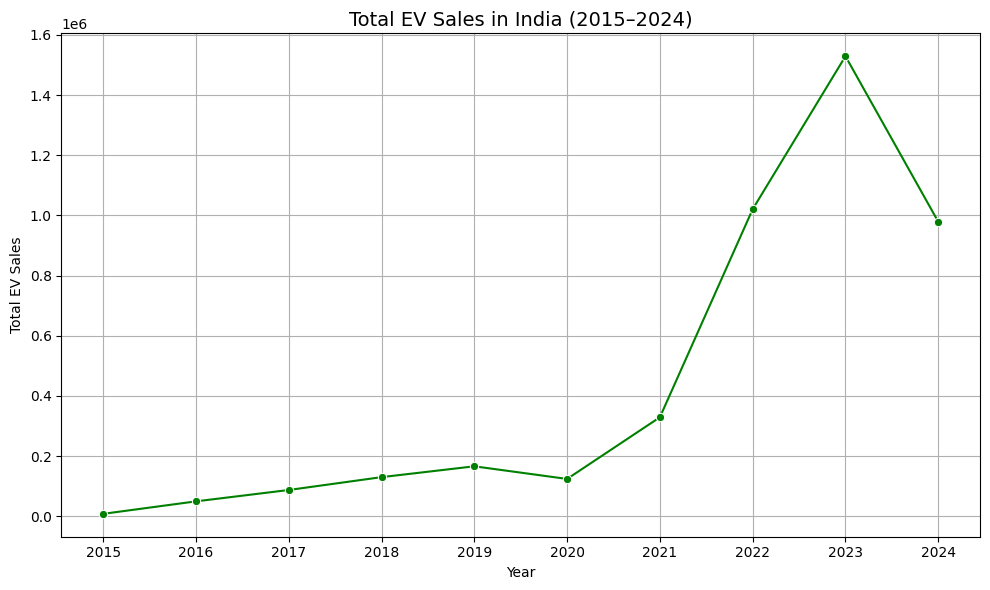

In [3]:
# Data cleaning
df['Maker'] = df['Maker'].str.strip().str.replace('"', '', regex=False)

# Define year columns
year_cols = [str(year) for year in range(2015, 2025)]

# Aggregate total sales by year
total_sales_by_year = df[year_cols].sum()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_sales_by_year.index, y=total_sales_by_year.values, marker='o', color='green')
plt.title("Total EV Sales in India (2015–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


CATEGORY WISE SALES

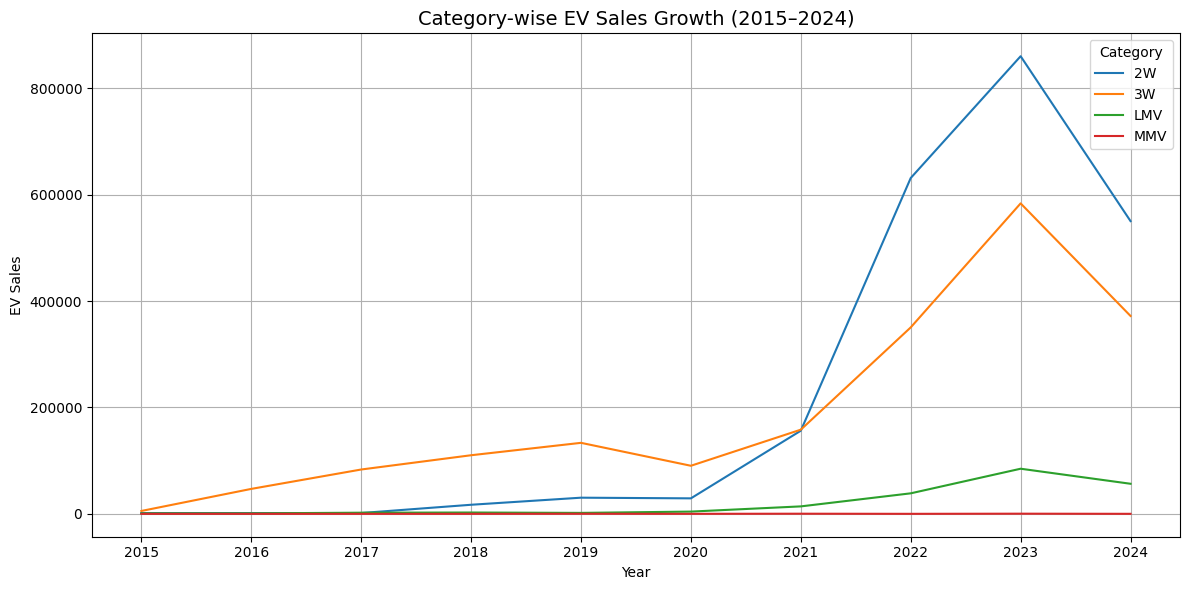

In [4]:
# Group by category and sum across years
cat_yearly_sales = df.groupby("Cat")[year_cols].sum().T  # Transpose for plotting

# Plot
plt.figure(figsize=(12, 6))
for category in cat_yearly_sales.columns:
    sns.lineplot(data=cat_yearly_sales, x=cat_yearly_sales.index, y=category, label=category)

plt.title("Category-wise EV Sales Growth (2015–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


MAKER WISE SALES

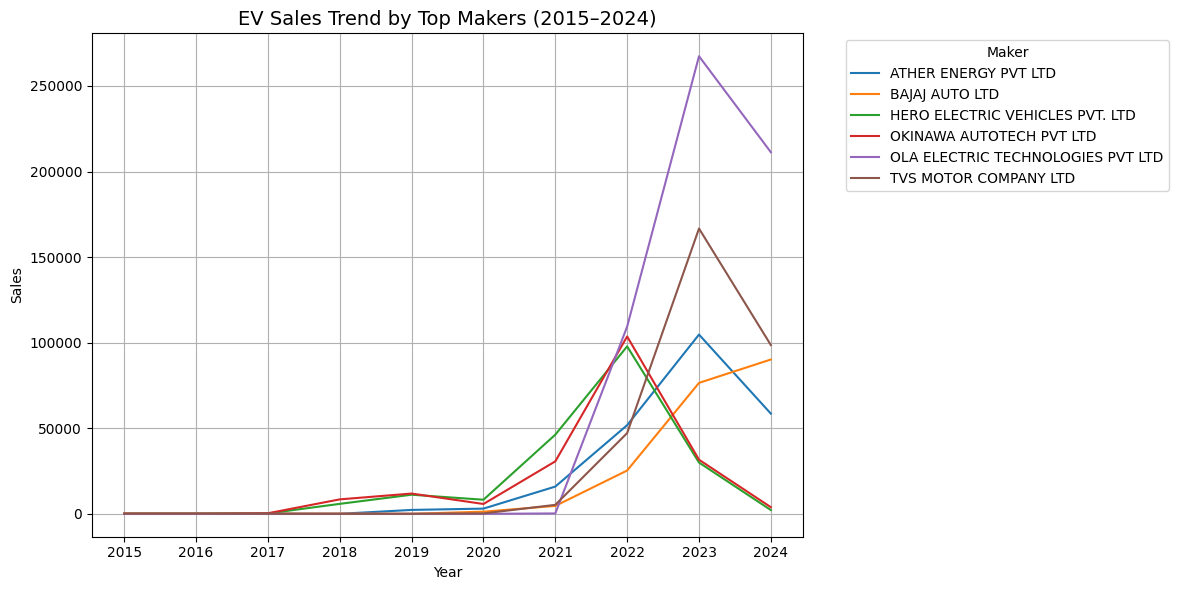

In [5]:
# Calculate total sales
df["Total_Sales"] = df[year_cols].sum(axis=1)

# Get top 6 makers by total sales
top_makers = df.groupby("Maker")["Total_Sales"].sum().sort_values(ascending=False).head(6).index

# Filter data for top makers
df_top_makers = df[df["Maker"].isin(top_makers)]

# Group and sum by Maker and year
maker_sales_trend = df_top_makers.groupby("Maker")[year_cols].sum().T

# Plot
plt.figure(figsize=(12, 6))
for maker in maker_sales_trend.columns:
    sns.lineplot(data=maker_sales_trend, x=maker_sales_trend.index, y=maker, label=maker)

plt.title("EV Sales Trend by Top Makers (2015–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="Maker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


2W vs LMV

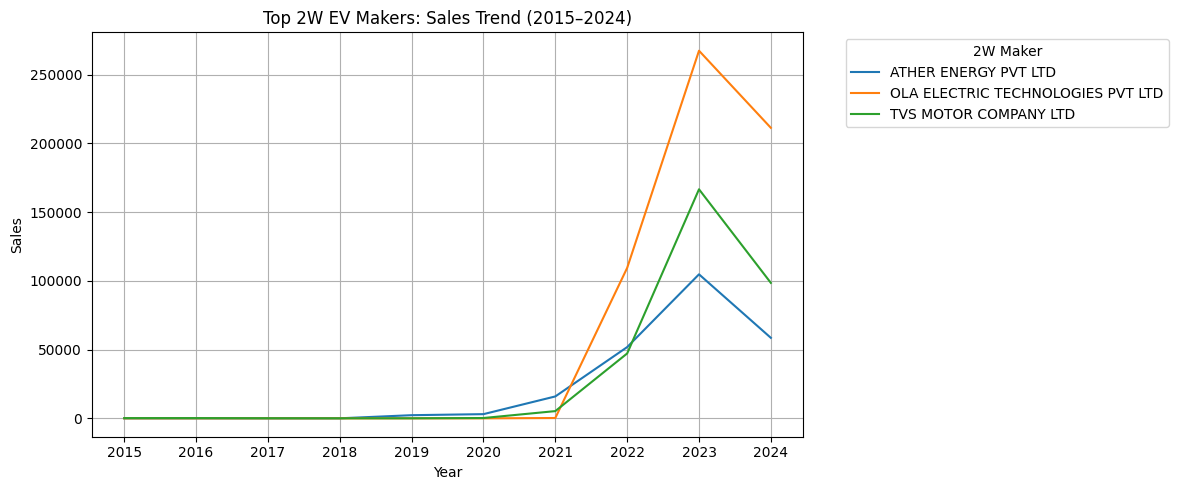

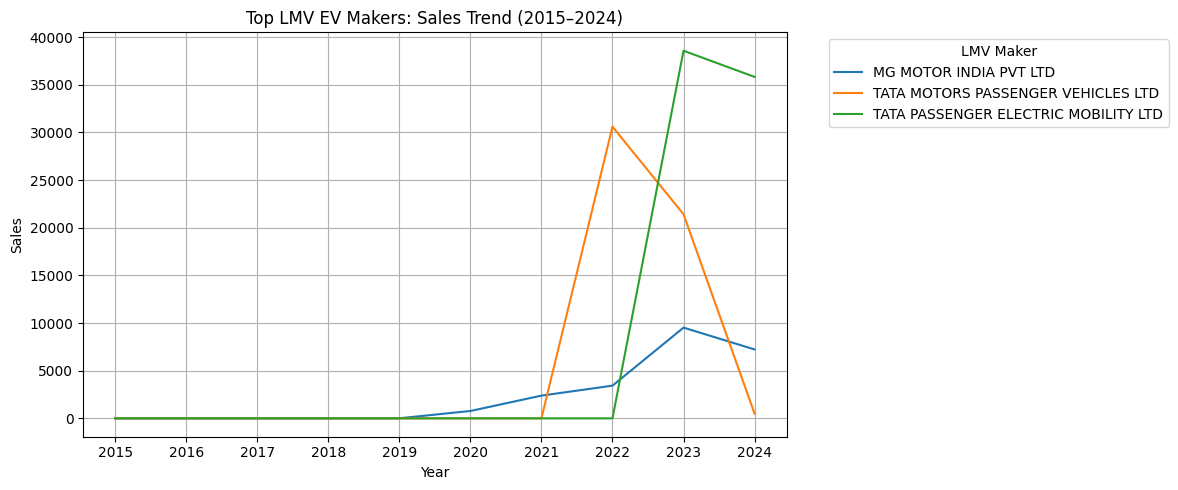

In [6]:
# Split into 2W and 4W categories
df_2w = df[df["Cat"] == "2W"]
df_4w = df[df["Cat"] == "LMV"]

# Get top 3 makers from each category
top_2w = df_2w.groupby("Maker")["Total_Sales"].sum().sort_values(ascending=False).head(3).index
top_4w = df_4w.groupby("Maker")["Total_Sales"].sum().sort_values(ascending=False).head(3).index

# Filter and aggregate yearly sales for plotting
df_2w_top = df_2w[df_2w["Maker"].isin(top_2w)].groupby("Maker")[year_cols].sum().T
df_4w_top = df_4w[df_4w["Maker"].isin(top_4w)].groupby("Maker")[year_cols].sum().T

# Plot 2W growth trends
plt.figure(figsize=(12, 5))
for maker in df_2w_top.columns:
    sns.lineplot(data=df_2w_top, x=df_2w_top.index, y=maker, label=maker)
plt.title("Top 2W EV Makers: Sales Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="2W Maker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 4W growth trends
plt.figure(figsize=(12, 5))
for maker in df_4w_top.columns:
    sns.lineplot(data=df_4w_top, x=df_4w_top.index, y=maker, label=maker)
plt.title("Top LMV EV Makers: Sales Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="LMV Maker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


BAR GRAPH of Top 10 EV Makers by Total Sales (2015-2024)

<ipython-input-7-606210e65985>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


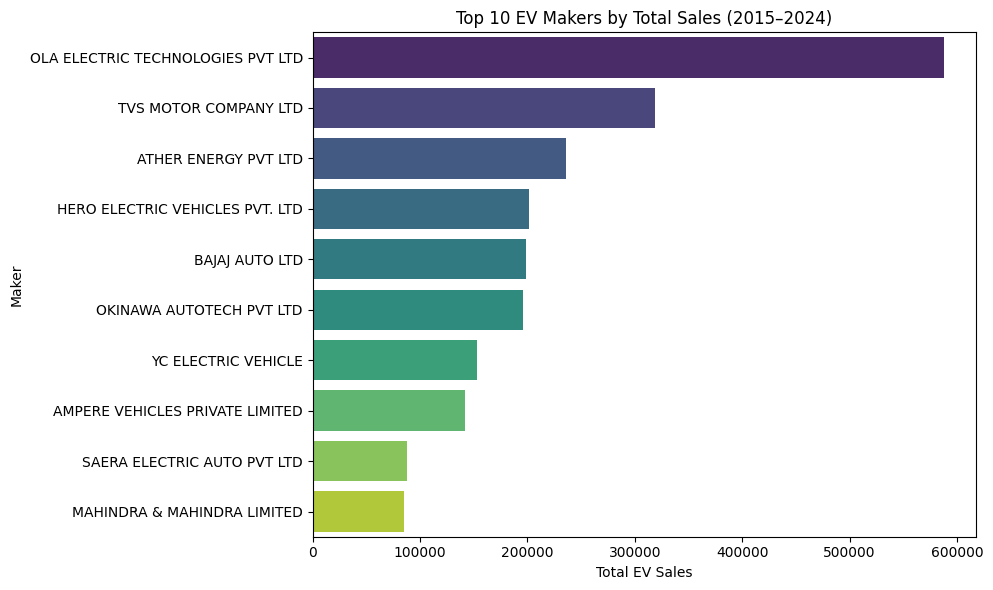

In [7]:


top10 = df.groupby("Maker")["Total_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title("Top 10 EV Makers by Total Sales (2015–2024)")
plt.xlabel("Total EV Sales")
plt.ylabel("Maker")
plt.tight_layout()
plt.show()


Year-on-Year Growth Rate of EV Sales (%)

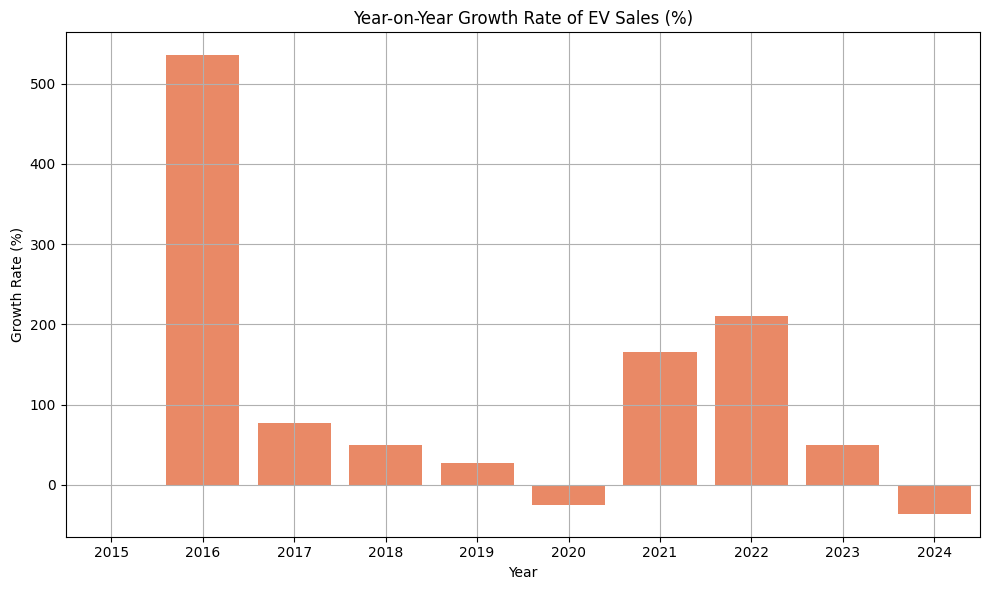

In [8]:
total_sales_by_year = df[year_cols].sum()
yoy_growth = total_sales_by_year.pct_change() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=yoy_growth.index, y=yoy_growth.values, color='coral')
plt.title("Year-on-Year Growth Rate of EV Sales (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


 EV Sales Heatmap for Top Makers (2015-2024)

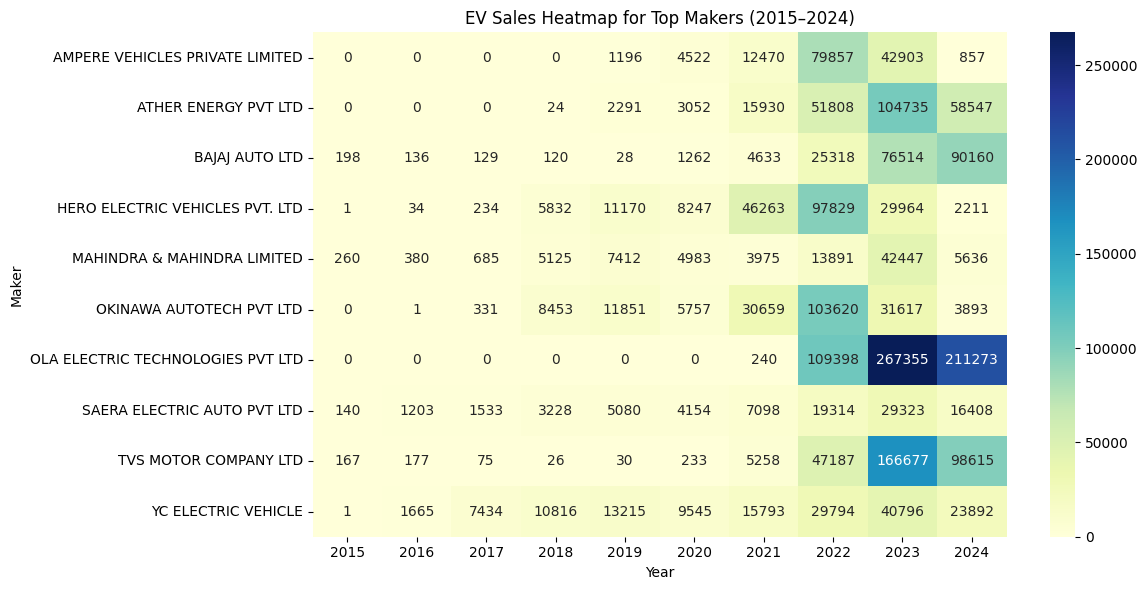

In [9]:
top_makers = df.groupby("Maker")["Total_Sales"].sum().sort_values(ascending=False).head(10).index
df_top = df[df["Maker"].isin(top_makers)]

heatmap_data = df_top.groupby("Maker")[year_cols].sum()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("EV Sales Heatmap for Top Makers (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Maker")
plt.tight_layout()
plt.show()


 Top 10 New EV Makers (Entered Post-2020)

<ipython-input-10-7762a3878c11>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_new.values, y=top_new.index, palette='magma')


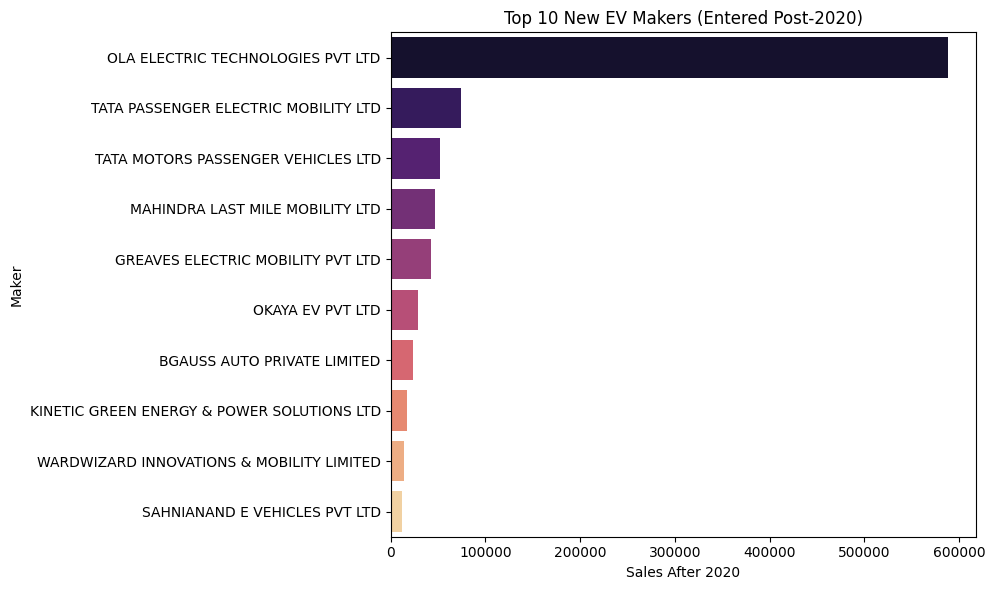

In [10]:
df_post2020 = df.copy()
df_post2020['Pre2020_Sales'] = df_post2020[[str(y) for y in range(2015, 2021)]].sum(axis=1)
df_post2020['Post2020_Sales'] = df_post2020[[str(y) for y in range(2021, 2025)]].sum(axis=1)

# Filter for new players after 2020 (with zero sales before)
new_makers = df_post2020[df_post2020['Pre2020_Sales'] == 0]
top_new = new_makers.groupby("Maker")['Post2020_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_new.values, y=top_new.index, palette='magma')
plt.title("Top 10 New EV Makers (Entered Post-2020)")
plt.xlabel("Sales After 2020")
plt.ylabel("Maker")
plt.tight_layout()
plt.show()


Category-Wise Market Share Over Time

<Axes: >

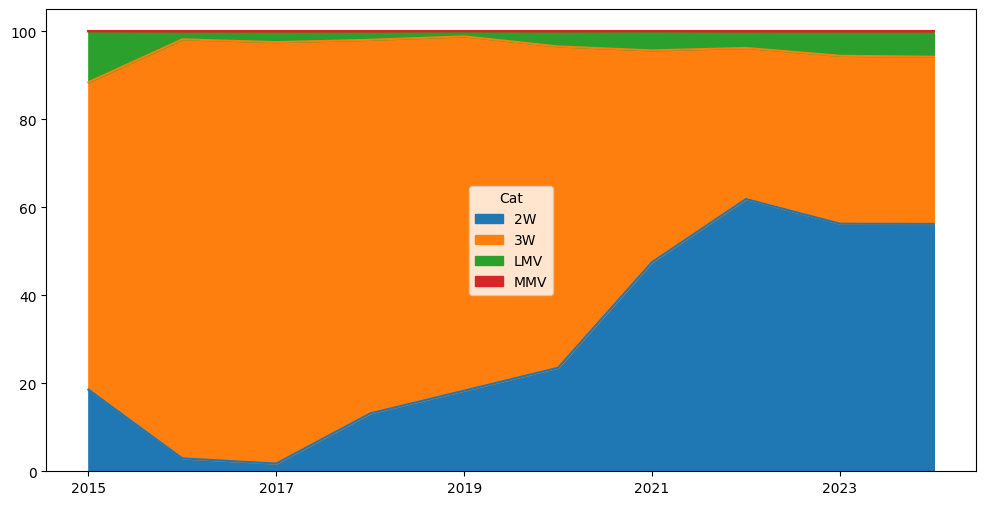

In [14]:
# Group by 'Cat' and sum across years
category_yearly = df.groupby("Cat")[year_cols].sum()
category_share = category_yearly.div(category_yearly.sum(axis=0), axis=1) * 100
category_share.T.plot(kind='area', stacked=True, figsize=(12,6))
